In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
news = pd.read_csv("sentiment_analysis/sentiment_TEST.csv") #document with user interactions
news = news.loc[:, ~news.columns.str.contains('^Unnamed')]
news.head()

,ID,Category,SubCategory,Content,Content_emb,Sentiment
0,N55189,tv,tvnews,"'Wheel Of Fortune' Guest Delivers Hilarious, O...","[-0.020967688411474228, -0.020634232088923454,...",Positive
1,N42782,sports,baseball_mlb,Three takeaways from Yankees' ALCS Game 5 vict...,"[-0.008319429121911526, 0.0013667173916473985,...",Positive
2,N34694,tv,tvnews,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,"[-0.042908210307359695, -0.018993420526385307,...",Positive
3,N45794,news,newscrime,Four flight attendants were arrested in Miami'...,"[-0.007930373772978783, -0.0221870094537735, 0...",Positive
4,N18445,sports,football_ncaa,Michigan sends breakup tweet to Notre Dame as ...,"[-0.020153459161520004, -0.044797133654356, 0....",Positive


In [5]:
behaviors = pd.read_csv("embeddings/users_emb_TEST.csv")
behaviors.columns =['User', 'ID', 'Interactions_emb'] 
behaviors.head()

,User,ID,Interactions_emb
0,U13740,N55189 N42782 N34694 N45794 N18445 N63302 N104...,"[-0.015360403599010574, -0.022621901123784482,..."
1,U91836,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,"[-0.005392600822233362, -0.004443325935426401,..."
2,U73700,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,"[-0.004993118400064608, -0.008147992255787054,..."


In [6]:
#CATEGORIES: final version

def generate_combined_category_graphs(n, user_id, recommender_type): # n - the number of considered recommendations
    # Get the list of articles read by the user
    user_articles = behaviors[behaviors['User'] == user_id]['ID'].str.split().explode().tolist()
    # Filter news_df based on user's articles
    user_news_df = news[news['ID'].isin(user_articles)]

    # Get unique categories with values in user data
    categories_user = user_news_df['Category'].unique()

    # Plot Category distribution for user
    category_counts_user = user_news_df['Category'].value_counts()
    values_user = category_counts_user.reindex(categories_user, fill_value=0).values.tolist()

    if recommender_type == "col":
        recommendation_df = pd.read_csv("collaborative_recommendations/" + user_id + "_collab.csv")
    elif recommender_type == "con":
        recommendation_df = pd.read_csv("content_recommendations/" + user_id + "_content.csv")
 
        
    # Take the first n rows from the recommendation dataframe
    top_n_recommendations = recommendation_df.head(n)
    # Extract the IDs from the recommendation dataframe
    recommended_ids = top_n_recommendations['ID'].tolist()
    # Filter news_df based on recommended IDs
    recommended_news_df = news[news['ID'].isin(recommended_ids)]

    # Get unique categories with values in recommendations data
    categories_recommend = recommended_news_df['Category'].unique()

    # Plot Category distribution for recommendations
    category_counts_recommend = recommended_news_df['Category'].value_counts()
    values_recommend = category_counts_recommend.reindex(categories_recommend, fill_value=0).values.tolist()

    # Combine unique categories from both user and recommendations
    all_categories = np.unique(np.concatenate((categories_user, categories_recommend), axis=None))

    # Calculate total counts for each category
    total_counts = [category_counts_user.get(cat, 0) + category_counts_recommend.get(cat, 0) for cat in all_categories]

    # Sort categories based on total counts in descending order
    sorted_categories = [cat for _, cat in sorted(zip(total_counts, all_categories), reverse=True)]

    # Plot grouped bar chart with improved aesthetics
    bar_width = 0.35
    index_user = np.arange(len(all_categories))
    index_recommend = np.arange(len(all_categories)) + bar_width

    plt.figure(figsize=(12, 6))
    
    # Plot bars for recommendations
    plt.bar(index_recommend, [category_counts_recommend.get(cat, 0) for cat in sorted_categories], bar_width, color='#ff7f00', label='Recommendations', alpha=0.7, edgecolor='black')
    
    # Plot bars for user
    plt.bar(index_user, [category_counts_user.get(cat, 0) for cat in sorted_categories], bar_width, color='#1f78b4', label='User profile', alpha=0.7, edgecolor='black')

    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(index_user + bar_width / 2, sorted_categories, rotation=45, ha='right', fontsize=12)
    plt.legend(fontsize=12)
    
    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [7]:
id = "U91836"

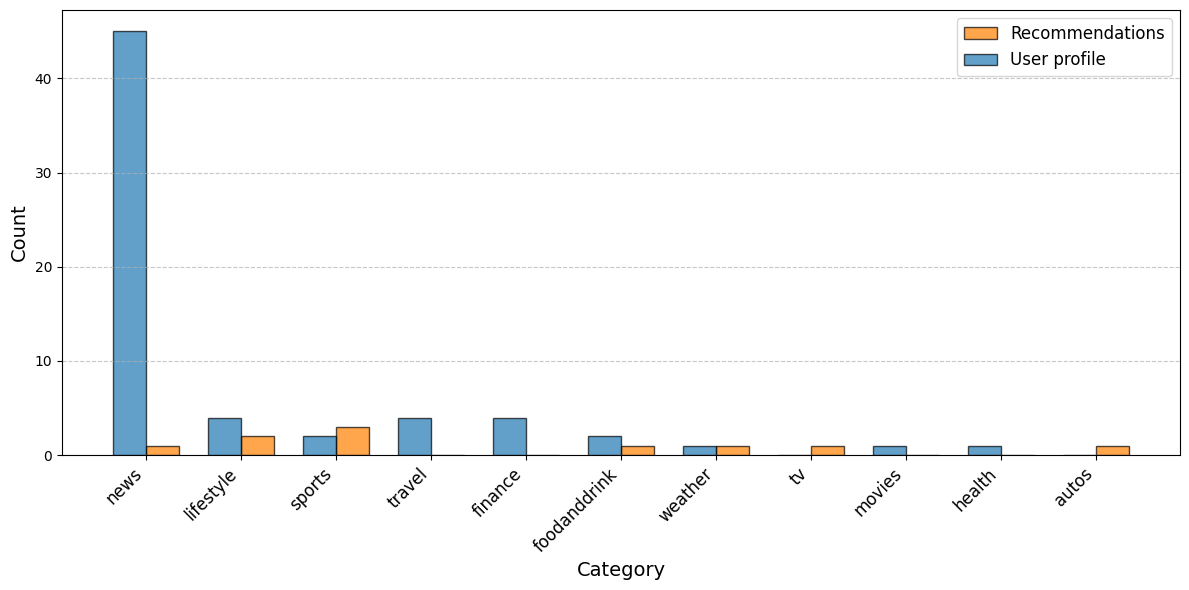

In [8]:
generate_combined_category_graphs(10, id, "col")

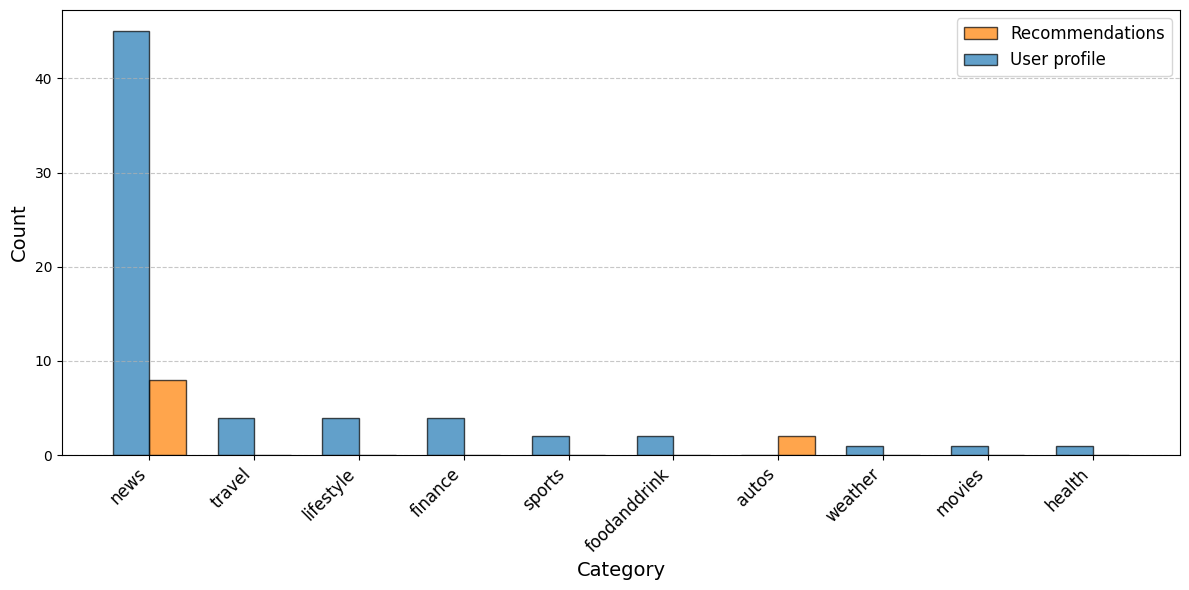

In [9]:
generate_combined_category_graphs(10, id, "con")

In [10]:
#SUBCATEGORIES: final version

def generate_combined_subcategory_graphs(n, user_id, recommender_type):
    # Get the list of articles read by the user
    user_articles = behaviors[behaviors['User'] == user_id]['ID'].str.split().explode().tolist()
    # Filter news_df based on user's articles
    user_news_df = news[news['ID'].isin(user_articles)]

    # Get unique subcategories with values in user data
    subcategories_user = user_news_df['SubCategory'].unique()

    # Plot SubCategory distribution for user
    subcategory_counts_user = user_news_df['SubCategory'].value_counts()
    values_user = subcategory_counts_user.reindex(subcategories_user, fill_value=0).values.tolist()

    if recommender_type == "col":
        recommendation_df = pd.read_csv("collaborative_recommendations/" + user_id + "_collab.csv")
    elif recommender_type == "con":
        recommendation_df = pd.read_csv("content_recommendations/" + user_id + "_content.csv")
        
    # Take the first n rows from the recommendation dataframe
    top_n_recommendations = recommendation_df.head(n)
    # Extract the IDs from the recommendation dataframe
    recommended_ids = top_n_recommendations['ID'].tolist()
    # Filter news_df based on recommended IDs
    recommended_news_df = news[news['ID'].isin(recommended_ids)]

    # Get unique subcategories with values in recommendations data
    subcategories_recommend = recommended_news_df['SubCategory'].unique()

    # Plot SubCategory distribution for recommendations
    subcategory_counts_recommend = recommended_news_df['SubCategory'].value_counts()
    values_recommend = subcategory_counts_recommend.reindex(subcategories_recommend, fill_value=0).values.tolist()

    # Combine unique subcategories from both user and recommendations
    all_subcategories = np.unique(np.concatenate((subcategories_user, subcategories_recommend), axis=None))

    # Calculate total counts for each subcategory
    total_counts = [subcategory_counts_user.get(subcat, 0) + subcategory_counts_recommend.get(subcat, 0) for subcat in all_subcategories]

    # Sort subcategories based on total counts in descending order
    sorted_subcategories = [subcat for _, subcat in sorted(zip(total_counts, all_subcategories), reverse=True)]

    # Plot grouped bar chart with improved aesthetics
    bar_width = 0.35
    index_user = np.arange(len(all_subcategories))
    index_recommend = np.arange(len(all_subcategories)) + bar_width

    plt.figure(figsize=(12, 6))
    
    # Plot bars for recommendations
    plt.bar(index_recommend, [subcategory_counts_recommend.get(subcat, 0) for subcat in sorted_subcategories], bar_width, color='lightblue', label='Recommendations', alpha=0.7, edgecolor='black')
    
    # Plot bars for user
    plt.bar(index_user, [subcategory_counts_user.get(subcat, 0) for subcat in sorted_subcategories], bar_width, color='lightcoral', label='User profile', alpha=0.7, edgecolor='black')

    #plt.title('SubCategory Distribution for User and Top {} Recommendations'.format(n), fontsize=16)
    plt.xlabel('SubCategory', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(index_user + bar_width / 2, sorted_subcategories, rotation=45, ha='right', fontsize=12)
    plt.legend(fontsize=12)
    
    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



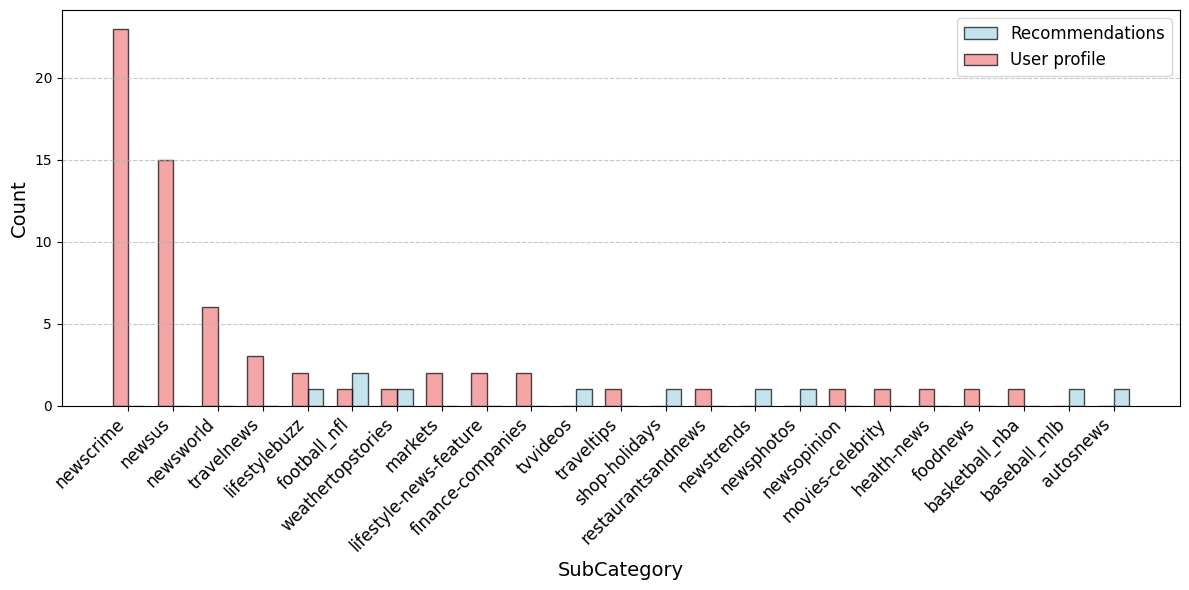

In [11]:
generate_combined_subcategory_graphs(10, id, "col")

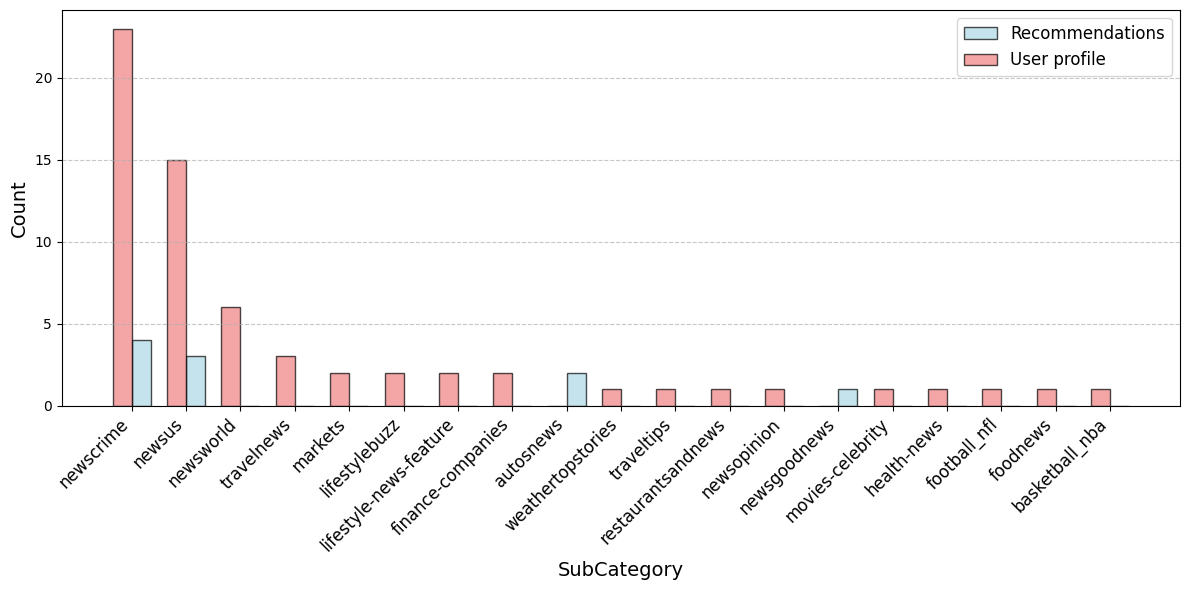

In [12]:
generate_combined_subcategory_graphs(10, id, "con")

In [13]:
def generate_combined_sentiment_graphs(n, user_id, recommender_type):
    # Get the list of articles read by the user
    user_articles = behaviors[behaviors['User'] == user_id]['ID'].str.split().explode().tolist()
    # Filter news_df based on user's articles
    user_news_df = news[news['ID'].isin(user_articles)]

    # Plot Sentiment distribution for user
    sentiment_counts_user = user_news_df['Sentiment'].value_counts()
    sentiments_user = sentiment_counts_user.index.tolist()
    values_user = sentiment_counts_user.values.tolist()

    # Load recommendation data
    if recommender_type == "col":
        recommendation_df = pd.read_csv("collaborative_recommendations/" + user_id + "_collab.csv")
    elif recommender_type == "con":
        recommendation_df = pd.read_csv("content_recommendations/" + user_id + "_content.csv")
        
    # Take the first n rows from the recommendation dataframe
    top_n_recommendations = recommendation_df.head(n)
    # Extract the IDs from the recommendation dataframe
    recommended_ids = top_n_recommendations['ID'].tolist()
    # Filter news_df based on recommended IDs
    recommended_news_df = news[news['ID'].isin(recommended_ids)]

    # Plot Sentiment distribution for recommendations
    sentiment_counts_recommend = recommended_news_df['Sentiment'].value_counts()
    sentiments_recommend = sentiment_counts_recommend.index.tolist()
    values_recommend = sentiment_counts_recommend.values.tolist()

    # Combine unique sentiments from both user and recommendations
    all_sentiments = np.unique(np.concatenate((sentiments_user, sentiments_recommend), axis=None))

    # Calculate total counts for each sentiment
    total_counts = [sentiment_counts_user.get(sent, 0) + sentiment_counts_recommend.get(sent, 0) for sent in all_sentiments]

    # Sort sentiments based on total counts in descending order
    sorted_sentiments = [sent for _, sent in sorted(zip(total_counts, all_sentiments), reverse=True)]

    # Plot grouped bar chart for Sentiment with improved aesthetics
    bar_width = 0.35
    index_user = np.arange(len(all_sentiments))
    index_recommend = np.arange(len(all_sentiments)) + bar_width

    plt.figure(figsize=(10, 6))
    
    # Plot bars for recommendations
    plt.bar(index_recommend, [sentiment_counts_recommend.get(sent, 0) for sent in sorted_sentiments], bar_width, color='#fffdc4', label='Recommendations', alpha=0.7, edgecolor='black')
    
    # Plot bars for user
    plt.bar(index_user, [sentiment_counts_user.get(sent, 0) for sent in sorted_sentiments], bar_width, color='lightgreen', label='User profile', alpha=0.7, edgecolor='black')

    #plt.title('Sentiment Distribution for User and Top {} Recommendations'.format(n), fontsize=16)
    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(index_user + bar_width / 2, sorted_sentiments, rotation=45, ha='right', fontsize=12)
    plt.legend(fontsize=12)
    
    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

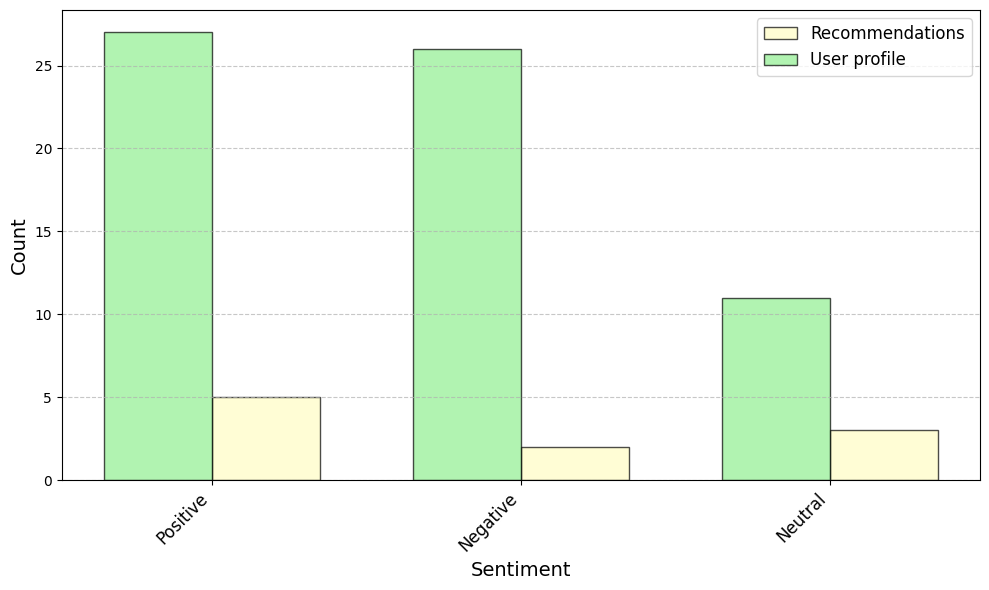

In [14]:
generate_combined_sentiment_graphs(10, id, "col")

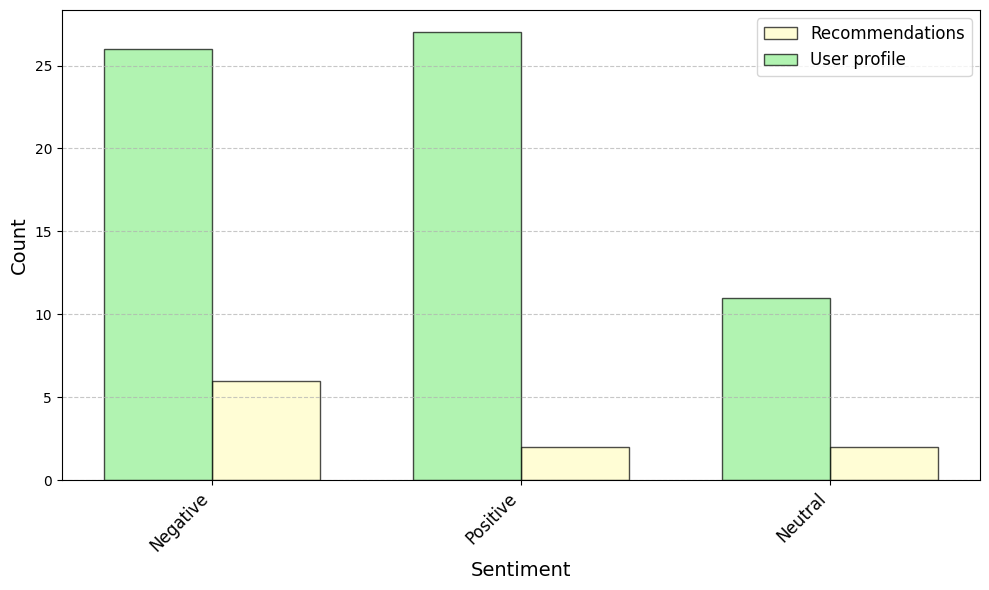

In [15]:
generate_combined_sentiment_graphs(10, id, "con")